In [1]:
#!/usr/env/bin python3

import matplotlib.pyplot as plt
import matplotlib.image as img
from matplotlib import cm

import numpy as np
import os
from math import sqrt

from utils import *


In [2]:


'''
Starter code for loading files, calibration data, and transformations
'''

# File paths
calib_dir = os.path.abspath('./data/calib')
image_dir = os.path.abspath('./data/image')
lidar_dir = os.path.abspath('./data/velodyne')
sample = '000000'

# Load the image
image_path = os.path.join(image_dir, sample + '.png')
image = img.imread(image_path)

# Load the LiDAR points
lidar_path = os.path.join(lidar_dir, sample + '.bin')
lidar_points = load_velo_points(lidar_path)

# Load the body to camera and body to LiDAR transforms
body_to_lidar_calib_path = os.path.join(calib_dir, 'calib_imu_to_velo.txt')
T_lidar_body = load_calib_rigid(body_to_lidar_calib_path)

# Load the camera calibration data
# Remember that when using the calibration data, there are 4 cameras with IDs
# 0 to 3. We will only consider images from camera 2.
lidar_to_cam_calib_path = os.path.join(calib_dir, 'calib_velo_to_cam.txt')
cam_to_cam_calib_path = os.path.join(calib_dir, 'calib_cam_to_cam.txt')
cam_calib = load_calib_cam_to_cam(lidar_to_cam_calib_path, cam_to_cam_calib_path)
intrinsics = cam_calib['K_cam2']
T_cam2_lidar = cam_calib['T_cam2_velo']



In [3]:
#ntrinsics

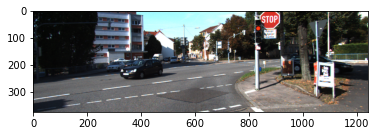

In [4]:
plt.figure()
plt.imshow(image)
plt.show()


In [5]:
'''
For you to complete:
'''
# Part 1: Convert LiDAR points from LiDAR to body frame (for depths)
# Note that the LiDAR data is in the format (x, y, z, r) where x, y, and z are
# distances in metres and r is a reflectance value for the point which can be
# ignored. x is forward, y is left, and z is up. Depth can be calculated using
# d^2 = x^2 + y^2 + z^2
depth= []
point_xyz_list = []
lidar_body_points= []

for point in lidar_points:
    #depth Calculations
    point_xyz = point[:3]
    depth.append(sqrt(sum([x*x for x in point_xyz])))
    
    point_xyz = np.insert(point_xyz,3,1)   
    point_xyz_list.append(point_xyz)
   
    # converting Lidar points from Lidar frame to Body Frame
    lidar_body_points.append(np.dot(T_lidar_body,point_xyz))

In [6]:
# Part 2: Convert LiDAR points from LiDAR to camera 2 frame
lidar_camera_points = []

for point in point_xyz_list:
    
    lidar_camera_point = np.dot(T_cam2_lidar,point)
    #print(lidar_camera_point)
    lidar_camera_points.append(lidar_camera_point)

# for more efficient code use list comprehension above

#print('Lidar to camera total points: ',len(lidar_camera_points))
#print('Total depth points: ',len(depth))

In [7]:
# Part 3: Project the points from the camera 2 frame to the image plane. You # may assume no lens distortion in the image. 
#Remember to filter out points where the projection does not lie within the image field, which is 1242x375.

points_in_image = []

for point in lidar_camera_points:
    
    #Normalize points and convert to camera frame
    point_in_image = np.dot(intrinsics,np.divide(point[:3],point[2]))
    points_in_image.append(point_in_image)  

#print('Points in Image frame',len(points_in_image))

In [8]:
points_in_image_xy=[]
points_in_image_depth=[]

for i, point in enumerate(points_in_image):
    if (point[0]<=1242 and point[0]>=0):
        if (point[1]<=375 and point[1]>=0):
            #print("i value:",i," points: ",point)
            points_in_image_xy.append(point)
            points_in_image_depth.append(depth[i]) 

#print('Points in given image frame 1242X375: ',len(points_in_image_xy))

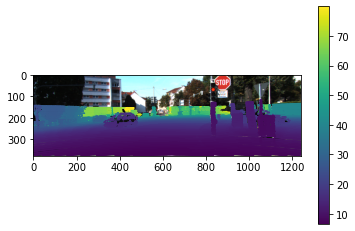

In [9]:
# Part 4: Overlay the points on the image with the appropriate depth values.
# Use a colormap to show the difference between points' depths and remember to
# include a colorbar.

x = []
y = []
for point in points_in_image_xy:

    x.append(float(point[0]))
    y.append(float(point[1]))
    
img_x_vector = np.array(x)
img_y_vector = np.array(y)
img_d_vector = np.array(points_in_image_depth)

plt.figure()

plt.scatter(img_x_vector,img_y_vector, s=1, c=img_d_vector, cmap = "viridis")   
plt.colorbar()

plt.imshow(image)
plt.show()  

In [10]:
print(img_x_vector)

[562.11562623 559.83431873 555.3419596  ... 624.87299592 622.52261244
 620.18293706]


In [11]:
image[img_x_vector[0],img_y_vector[0]]

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices